## Does the **Money** follow the **Ball**?

The Notebook you just completed reproduced Table 1 from the Hakes and Sauer Moneyball paper. This showed that in the period 
1999-2003, winning percentage in Major League Baseball could, to a significant degree, be accounted for by on-base percentage (OBP). The effect of OBP appeared to be much larger than that of slugging percentage (SLG), a statistic commonly relied upon as an indicator of likely success.

The implication of Table 1 is that batters whose productivity measured by OBP should, all else equal, be valued more highly than batters with an equivalent value of SLG. In a competitive market, we should expect to observe salaries to be strongly correlated with OBP, more so than with SLG.

Hakes and Sauer set out to test this proposition by running a regression of batter salaries on OBP and SLG, as well as some other key factors likely to influence salary level. These other factors are

>**Plate appearances**: consistency is likely to be prized
<br>
>**Arbitration eligibility and free agency**: as players length of service increases then so does their bargaining power
<br>
>**Fielding position**: catchers in particular provide a valuable service so can command a higher salary for the same level of batting performance
<br>

Note that the focus of the analysis is batters- we are not including pitchers in this analysis.
<br>
<br>
The pattern of results in Table 3 is very striking. The top two rows tell us the importance of OBP and SLG. In every year SLG is statistically significant and affects the salary value in roughly the same way (the size of the coefficient is consistently between 2 and 3). However, in the top row we can see that OBP is statistically insignificant in every season (conventional statistical significance is denoted by the ratio of the coefficient and the standard error (in parentheses) being roughly larger than 2 in absolute value). But then in 2004, the year after Moneyball was published, OBP is not only statistically significant, the coefficient is almost twice the size as the coefficient on SLG. Suddenly, the market seemed to reward OBP.
<br>
<br>
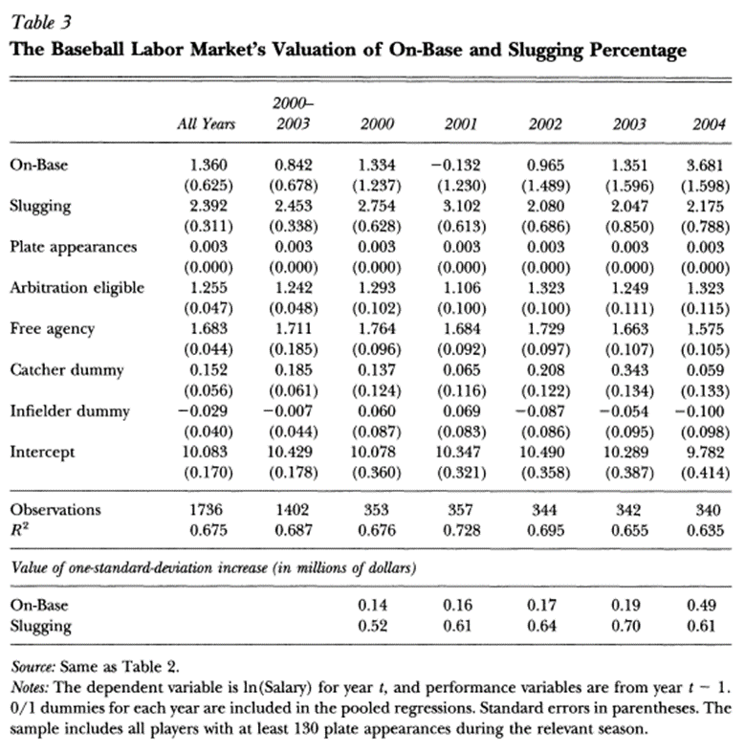

<br>
<br>




# Creating the dataframe

We will now set about reproducing Table 3.
<br>
To re-run the Hakes and Sauer Table 3 regression we need to create a df containing the the variables they used:

>log(Salary) = b<sub>0</sub> + b<sub>1</sub> OBP + b<sub>2</sub> SLG + b<sub>3</sub> PA + b<sub>4</sub> Arb + b<sub>5</sub> Free + b<sub>6</sub> Catcher + b<sub>7</sub> Infielder


*The Salary data is in the salary file (Step 1)*

*The OBP, SLG and PA data can be created from the batting file (Step 2)*

*The Arb (arbitration elegible) and Free (agent) data can be created from the People file (Step 3)*

*The Catcher and Infielder can be created from the Appearances file (Step 4)*

We will combine all these variables in a Master file, and then run the regessions.


## Merging dataframes

Before running the code, it's useful to visualize the process. To run the regression at the end, we want to create a "rectangular" dataframe. All our variables will be lined up in columns and the number of rows will be the same for each variable. We will also discard rows where there are missing variables. You can think of the df as looking like this:

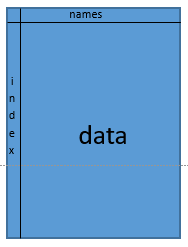

To create our df we need to merge data from different sources. 

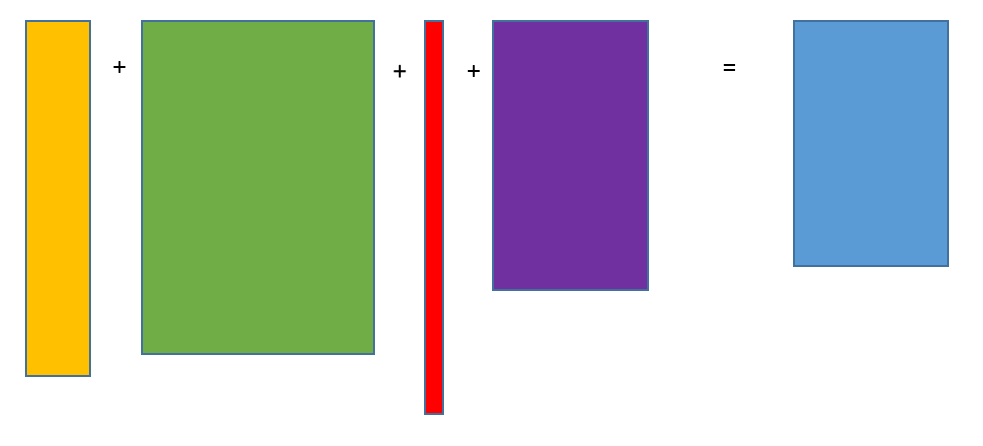

This will involve operations to:
<br>
>Create new variables inside an existing df.
<br>
>Merge two dfs.
<br>
>Drop variables that are not relevant for our final df.



# Step 1

In [1]:
# First we load the packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Note that at each step we look at the data (using "display()") - this is both to keep a check on what we are doing and to look out for mistakes.

In [2]:
# Read in salary data retrieved from Lahman's Database

Salary = pd.read_csv("../Data/Salaries.csv")
display(Salary)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [3]:
# Not every salary is recorded, so first drop missing values

Salary = Salary[Salary.salary > 0] 
Salary

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [4]:
# Calculate natural log of salary 

Salary['lnSal'] = np.log(Salary['salary'])
Salary

,yearID,teamID,lgID,playerID,salary,lnSal
0,1985,ATL,NL,barkele01,870000,13.676248
1,1985,ATL,NL,bedrost01,550000,13.217674
2,1985,ATL,NL,benedbr01,545000,13.208541
3,1985,ATL,NL,campri01,633333,13.358752
4,1985,ATL,NL,ceronri01,625000,13.345507
5,1985,ATL,NL,chambch01,800000,13.592367
6,1985,ATL,NL,dedmoje01,150000,11.918391
7,1985,ATL,NL,forstte01,483333,13.088461
8,1985,ATL,NL,garbege01,772000,13.556740
9,1985,ATL,NL,harpete01,250000,12.429216


In [5]:
# Rename 'YearID' as 'SalYear'

# we're doing this because the salary is the money earned in the year the same year that player appeared
# we want to match salary with the previous year's performance, to see if the wage is determined by it 

Salary = Salary.rename(columns = {'yearID':'SalYear'})
Salary

,SalYear,teamID,lgID,playerID,salary,lnSal
0,1985,ATL,NL,barkele01,870000,13.676248
1,1985,ATL,NL,bedrost01,550000,13.217674
2,1985,ATL,NL,benedbr01,545000,13.208541
3,1985,ATL,NL,campri01,633333,13.358752
4,1985,ATL,NL,ceronri01,625000,13.345507
5,1985,ATL,NL,chambch01,800000,13.592367
6,1985,ATL,NL,dedmoje01,150000,11.918391
7,1985,ATL,NL,forstte01,483333,13.088461
8,1985,ATL,NL,garbege01,772000,13.556740
9,1985,ATL,NL,harpete01,250000,12.429216


In [6]:
# Let's create a copy of the df which we call "Master", which we can then use to merge the information from all the other dfs

Master = Salary
Master

,SalYear,teamID,lgID,playerID,salary,lnSal
0,1985,ATL,NL,barkele01,870000,13.676248
1,1985,ATL,NL,bedrost01,550000,13.217674
2,1985,ATL,NL,benedbr01,545000,13.208541
3,1985,ATL,NL,campri01,633333,13.358752
4,1985,ATL,NL,ceronri01,625000,13.345507
5,1985,ATL,NL,chambch01,800000,13.592367
6,1985,ATL,NL,dedmoje01,150000,11.918391
7,1985,ATL,NL,forstte01,483333,13.088461
8,1985,ATL,NL,garbege01,772000,13.556740
9,1985,ATL,NL,harpete01,250000,12.429216


# Step 2

We now generate the individual statistics on OBP, SLG and plate appearances (PA). This data is taken from the Lahman database which can be accessed from  [Sean Lahman's website](http://www.seanlahman.com/). Sean Lahman is a journalist and baseball analyst with a strong commitment to the open source movement. Thanks to his pioneering work, much of the data needed to generate your own research is freely available on the web.

The Batting file from the Lahman database covers all major league players from 1871 to the present day (the database is updated annually - the version used here is the update published in March 2018 which included all seasons up to 2017).

Each statistic in the database is coded with a short name for ease of use. All the [definitions](http://www.seanlahman.com/files/database/readme2017.txt) can be found on the Lahman website.

In [7]:
# Read in batting

Batting = pd.read_csv("../Data/Batting.csv")
pd.set_option('display.max_columns', 50)
display(Batting)

# Scrolling to the bottom of the window you can see that the size of the dataframe is 104324 rows × 22 columns

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,1,0,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,0,0,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,9,0,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,0,0,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,1,0,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


## Self test

Note that we used the command, pd.set_option('display.max_columns', 50).

Try running the code again without this line, and see what happens. 

## Stints

A player who moves teams can play for more than one club in a season. These are recorded as "stints" in the dataframe. We adjust a player's total performance statistics for the year, so we simply sum the data across stints. 

In [8]:
# Using '.groupby' to sum across stints

Batting = Batting.groupby(['playerID','yearID']).sum()
Batting.reset_index(inplace=True)
Batting

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,1,11,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,1,45,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2010,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2012,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,aardsda01,2013,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,aardsda01,2015,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
9,aaronha01,1954,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0


## Self test

Note that we've now lost the name of the team and the league from the data - since with the sum() command Python can't add together strings and so just drops them (which is fine since we won't need them). However, the player identifiers, which are also strings, are retained since the name never changes when a player has multiple stints.

We added the command, Batting.reset_index(inplace=True).

Trying running the code without this. Can you see why this would be a problem later on without reset_index?

## Variables required to define OBP and SLG

**SLG is defined as (Singles + 2x Doubles + 3x Triples + 4 x Home runs) / At bats**  
**OBP is defined as (Hits + Bases on Balls + Hit by Pitch)/(At bats + Bases on Balls + Hit by Pitch + Sacrifice Flies)**  

Singles and Plate Appearances are not listed separately in the Lahman batting dataframe, but singles can be defined as Hits - Home runs - Triples - Doubles. Plate appearances can be defined as At bats + Base on Balls (Walk) + Hit by pitch + Sacrfice hits + Sacrifice flies.

The variables we need have mostly intuitive names: AB, H, 2B, 3B, HR, R, BB, HBP, SF, SH.

We're not going to use all the data back to 1871. Hakes and Sauer worked on the data from 1999-2004. Later, we will extend this analysis. So right now we'll limit our data range to the years 1993-2016. In addition, we limit the player sample to players with more than 130  At Bats. All players below this threshold are defined as rookies. 

In [9]:
# Subset Batting data to only include seasons 1994-2016 and batters with at least 130 AB

Batting = Batting[(Batting.yearID >= 1993) & (Batting.yearID <= 2016) & (Batting.AB >= 130)].copy()
display(Batting)

# you can see that our dt now consists of 8937 rows × 20 columns

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
98,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0
100,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0
113,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0
114,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0
115,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0
116,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0
117,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0
118,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0
119,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0
144,abercre01,2006,1,111,255,39,54,12,2,5,24.0,6.0,5.0,18,78.0,2.0,3.0,4.0,1.0,2.0


Note: Note the addition of ".copy()" to the command. The code will, in fact, run without this addition, but it will produce a warning message. This is not the same as an error message when your code doesn't run at all. Leaving out ".copy()" will not in fact affect anything in this notebook, but will continue to generate irritating warning messages. You will see this come up at other places in the notebooks.

## We now use the formulas to calculate PA, OBP and SLG

PA = AB + BB + HBP + SH + SF

OBP = (H + BB + HBP)/(AB + BB + HBP + SF)

SLG (H - 2B - 3B - HR + 2x2B + 3x3B + 4xHR) / AB

(Recall that Singles = H - 2B - 3B - HR)

In [10]:
# Calculate OBP and SLG in Batting data

Batting['PA'] = Batting['AB'] + Batting['BB'] + Batting['HBP'] + Batting['SH'] + Batting['SF']

Batting['OBP'] = (Batting['H'] + Batting['BB'] + Batting['HBP'])/(Batting['AB'] + Batting['BB']
                                                                  + Batting['HBP'] + Batting['SF'])

Batting['SLG'] = ((Batting['H'] - Batting['Doubles'] - Batting['Triples'] - Batting['HR']) 
                  + 2*Batting['Doubles'] + 3*Batting['Triples'] + 4*Batting['HR'])/Batting['AB']

display(Batting)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG
98,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803
100,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349
113,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203
114,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381
115,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125
116,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540
117,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526
118,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070
119,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535
144,abercre01,2006,1,111,255,39,54,12,2,5,24.0,6.0,5.0,18,78.0,2.0,3.0,4.0,1.0,2.0,281.0,0.270758,0.333333


We now want to merge the batting data with the salary data. Salary data relates to the year of the contract. We want to match the contract value with the statistics of the player in the year preceding - the economic logic is that the salary is based on batting performance, and for that to be the case, the performance must be observable. Last year's statistics are available to the team when negotiating salaries, but not the current year's salary.

To match this year's salary to last year's batting statistics, we simply add one to the year variable (yearID) in the batting df before we carry out the merge.

In [11]:
# Create another year variable to link previous season stats to next year's salary in batting data

Batting['SalYear'] = Batting['yearID'] + 1 
display(Batting)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,SalYear
98,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803,1999
100,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349,2001
113,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203,1995
114,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381,1996
115,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125,1997
116,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540,1998
117,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526,1999
118,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070,2000
119,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535,2001
144,abercre01,2006,1,111,255,39,54,12,2,5,24.0,6.0,5.0,18,78.0,2.0,3.0,4.0,1.0,2.0,281.0,0.270758,0.333333,2007


To carry out the merge we use pd.merge, identify the two dfs and the two variables that line the two dfs.

In [12]:
# carrying out the merge
Master = pd.merge(Batting, Master, on=['SalYear', 'playerID'])
display(Master)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,SalYear,teamID,lgID,salary,lnSal
0,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803,1999,CHA,AL,255000,12.449019
1,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349,2001,FLO,NL,300000,12.611538
2,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203,1995,FLO,NL,119000,11.686879
3,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381,1996,FLO,NL,250000,12.429216
4,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125,1997,FLO,NL,650000,13.384728
5,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540,1998,OAK,AL,1000000,13.815511
6,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526,1999,COL,NL,900000,13.710150
7,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070,2000,NYN,NL,500000,13.122363
8,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535,2001,ATL,NL,600000,13.304685
9,abernbr01,2001,1,79,304,43,82,17,1,5,33.0,8.0,3.0,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,0.328313,0.381579,2002,TBA,AL,215000,12.278393


# Step 3

Now we want to take account of the player's status in salary negotiations. For the first two years in the Majors you are tied to your club, and therefore your ability to bargain over salary is limited.

After two years you become "aribtration eligible", which means that if you are not satisfied with the salary you are offered you can take your dispute to arbitration, which will give you additional bargaining power.

Then, at the end of six years of service you become a free agent and are able to sign a contract with the highest bidder for your services.

These differences are likely to lead to differences in salary even among players of identical ability. As a result we want to define the bargaining status of each player based on their years of service.

To do this, we identify the year in which the player made his debut, and then calculate the years elapsed in order to identify his status.

Date of a player's debut is contained in the "People" file.

In [13]:
# Read in People data retrieved from Lahman's Database

People = pd.read_csv("../Data/People.csv")
display(People)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,NaN,NaN,NaN,Fernando,Abad,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2017-10-01,abadf001,abadfe01
6,abadijo01,1850.0,11.0,4.0,USA,PA,Philadelphia,1905.0,5.0,17.0,USA,NJ,Pemberton,John,Abadie,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10,abadj101,abadijo01
7,abbated01,1877.0,4.0,15.0,USA,PA,Latrobe,1957.0,1.0,6.0,USA,FL,Fort Lauderdale,Ed,Abbaticchio,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,abbae101,abbated01
8,abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,USA,VT,Colchester,Bert,Abbey,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,abbeb101,abbeybe01
9,abbeych01,1866.0,10.0,14.0,USA,NE,Falls City,1926.0,4.0,27.0,USA,CA,San Francisco,Charlie,Abbey,Charles S.,169.0,68.0,L,L,1893-08-16,1897-08-19,abbec101,abbeych01


In [14]:
# Extract debut year from debut date in player info data ("Debut" date is the only variable we want from this file)

Debut = People[['playerID','debut']].copy()

display(Debut)

,playerID,debut
0,aardsda01,2004-04-06
1,aaronha01,1954-04-13
2,aaronto01,1962-04-10
3,aasedo01,1977-07-26
4,abadan01,2001-09-10
5,abadfe01,2010-07-28
6,abadijo01,1875-04-26
7,abbated01,1897-09-04
8,abbeybe01,1892-06-14
9,abbeych01,1893-08-16


## Strings and integers

Data in Python can be recognized as strings (str) - characters making up a text - or as integers (int), meaning numbers.

We want to treat the debut date, e.g. 2015-09-04, as a string (even though it contains numbers). We have to tell Python to treat it as a string using the .astype(str) function. Strings can be sliced by identifying the first and last characters - the first character being identified as one less than its place in order. Thus the first character can be identified by 0.

To obtain the debut year, we need to extract only the first four characters from each string. Even though this will then look like numbers, e.g. 2015, it will still be treated as string. But, since 2015 can also be a number, we can convert it to an integer value later.

In [15]:
# extracting the first four characters

Debut['debutyr'] = Debut['debut'].astype(str).str[0:4]
Debut

,playerID,debut,debutyr
0,aardsda01,2004-04-06,2004
1,aaronha01,1954-04-13,1954
2,aaronto01,1962-04-10,1962
3,aasedo01,1977-07-26,1977
4,abadan01,2001-09-10,2001
5,abadfe01,2010-07-28,2010
6,abadijo01,1875-04-26,1875
7,abbated01,1897-09-04,1897
8,abbeybe01,1892-06-14,1892
9,abbeych01,1893-08-16,1893


## Self test

In the expression [0:4], the zero indicates the element in the string before the first one you want (which is 1), and the 4 represents the last element. Try using the same method to create the debut month ('debutm') and the debut day (debutd').

In [16]:
# Restrict the data to the playerID and debutyr

Debut = Debut[['playerID','debutyr']]

display(Debut)

,playerID,debutyr
0,aardsda01,2004
1,aaronha01,1954
2,aaronto01,1962
3,aasedo01,1977
4,abadan01,2001
5,abadfe01,2010
6,abadijo01,1875
7,abbated01,1897
8,abbeybe01,1892
9,abbeych01,1893


In [17]:
# Now merge debut year into master data
Master = pd.merge(Master, Debut, on=['playerID'], how = 'left')
display(Master)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,SalYear,teamID,lgID,salary,lnSal,debutyr
0,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803,1999,CHA,AL,255000,12.449019,1997
1,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349,2001,FLO,NL,300000,12.611538,1997
2,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203,1995,FLO,NL,119000,11.686879,1993
3,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381,1996,FLO,NL,250000,12.429216,1993
4,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125,1997,FLO,NL,650000,13.384728,1993
5,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540,1998,OAK,AL,1000000,13.815511,1993
6,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526,1999,COL,NL,900000,13.710150,1993
7,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070,2000,NYN,NL,500000,13.122363,1993
8,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535,2001,ATL,NL,600000,13.304685,1993
9,abernbr01,2001,1,79,304,43,82,17,1,5,33.0,8.0,3.0,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,0.328313,0.381579,2002,TBA,AL,215000,12.278393,2001


We now calculate years of experience. 

Note that because we defined 'debut' as a string in order to edit it, we now have to turn it back into an integer (int) in order to carry out an arithmetical operation. To turn it back into an integer we use .astype(int).

In [18]:
# Calculating years of experience

Master['Exp'] = Master['yearID'] - Master['debutyr'].astype(int)
display(Master)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,SalYear,teamID,lgID,salary,lnSal,debutyr,Exp
0,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803,1999,CHA,AL,255000,12.449019,1997,1
1,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349,2001,FLO,NL,300000,12.611538,1997,3
2,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203,1995,FLO,NL,119000,11.686879,1993,1
3,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381,1996,FLO,NL,250000,12.429216,1993,2
4,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125,1997,FLO,NL,650000,13.384728,1993,3
5,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540,1998,OAK,AL,1000000,13.815511,1993,4
6,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526,1999,COL,NL,900000,13.710150,1993,5
7,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070,2000,NYN,NL,500000,13.122363,1993,6
8,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535,2001,ATL,NL,600000,13.304685,1993,7
9,abernbr01,2001,1,79,304,43,82,17,1,5,33.0,8.0,3.0,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,0.328313,0.381579,2002,TBA,AL,215000,12.278393,2001,0


We now use np.where (which, for anyone familiar with Excel, works like an "if" formula) to identify arbitration eligible players and free agents. These are "dummy variables" - they either have a value of one if the player has that status, or zero. We don't need to define rookies - they are the default category.

There must always be default category when using dummy variables in a regression.

In [19]:
# Use experience as proxy to classify players contract status as arbitration eligible or free agent
Master['Arb'] = np.where((Master['Exp'] <= 6) & (Master['Exp'] >= 3),1,0)
Master['Free'] = np.where(Master['Exp'] > 6, 1, 0)
display(Master)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,SalYear,teamID,lgID,salary,lnSal,debutyr,Exp,Arb,Free
0,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803,1999,CHA,AL,255000,12.449019,1997,1,0,0
1,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349,2001,FLO,NL,300000,12.611538,1997,3,1,0
2,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203,1995,FLO,NL,119000,11.686879,1993,1,0,0
3,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381,1996,FLO,NL,250000,12.429216,1993,2,0,0
4,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125,1997,FLO,NL,650000,13.384728,1993,3,1,0
5,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540,1998,OAK,AL,1000000,13.815511,1993,4,1,0
6,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526,1999,COL,NL,900000,13.710150,1993,5,1,0
7,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070,2000,NYN,NL,500000,13.122363,1993,6,1,0
8,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535,2001,ATL,NL,600000,13.304685,1993,7,0,1
9,abernbr01,2001,1,79,304,43,82,17,1,5,33.0,8.0,3.0,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,0.328313,0.381579,2002,TBA,AL,215000,12.278393,2001,0,0,0


# Step 4

The final step in preparing the data is to identify the fielding position of the players, since this may also affect the salary that the player can command.

There are eight fielding positions, but Hakes and Sauer break these up into three groups: Catchers and Infielders, whom they define as either second base, third base or short stop. All other fielding positions are the default category.

The Appearances file from the Lahman database identifies each player's position, but to put the data into the format to run the regression requires a little manipulation.

In [20]:
# Read in player appearance data retrieved from Lahman's Database

Appearances = pd.read_csv("../Data/Appearances.csv")
display(Appearances)

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,0,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,0,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,1,2,20,0,1,0,0,1,0.0,0.0,0.0
5,1871,FW1,NaN,armstbo01,12,12.0,12,12.0,0,0,0,0,0,0,0,11,1,12,0.0,0.0,0.0
6,1871,RC1,NaN,barkeal01,1,1.0,1,1.0,0,0,0,0,0,0,1,0,0,1,0.0,0.0,0.0
7,1871,BS1,NaN,barnero01,31,31.0,31,31.0,0,0,0,16,0,15,0,0,0,0,0.0,0.0,0.0
8,1871,FW1,NaN,barrebi01,1,1.0,1,1.0,0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0
9,1871,BS1,NaN,barrofr01,18,17.0,18,18.0,0,0,0,1,0,0,13,0,4,17,0.0,0.0,0.0


The fielding positions defined in Appearances are catcher (G_c), first base (G_1b), second base (G_2b),third base (G_3b), short stop (G_ss) and outfielder (G_of). We should also include designated hitters (G_dh) since they are batters, even if they do not field. If unfamiliar with baseball click on the link for an explanation of the [designated hitter rule](http://m.mlb.com/glossary/rules/designated-hitter-rule).

As with the batting data, we once again have the problem of stints, so we now sum the data, including only the fielding positions, since the other variables are irrelevant for our analysis.

In [21]:
# Aggregate appearance data by stint using playerID and yearID

Appearances = Appearances.groupby(['playerID','yearID'])['G_c','G_1b','G_2b','G_3b','G_ss','G_of','G_dh'].sum()                                       
Appearances.reset_index(inplace=True)
display(Appearances)

# Note that we need to use 'reset.index' again

,playerID,yearID,G_c,G_1b,G_2b,G_3b,G_ss,G_of,G_dh
0,aardsda01,2004,0,0,0,0,0,0,0.0
1,aardsda01,2006,0,0,0,0,0,0,0.0
2,aardsda01,2007,0,0,0,0,0,0,0.0
3,aardsda01,2008,0,0,0,0,0,0,0.0
4,aardsda01,2009,0,0,0,0,0,0,0.0
5,aardsda01,2010,0,0,0,0,0,0,0.0
6,aardsda01,2012,0,0,0,0,0,0,0.0
7,aardsda01,2013,0,0,0,0,0,0,0.0
8,aardsda01,2015,0,0,0,0,0,0,0.0
9,aaronha01,1954,0,0,0,0,0,116,0.0


As you can see if you look at the data, individual players may play in more than one position in a season, although in many cases they play in only one position, and even if they play in more than one, they generally play in one position most of the time.  

In order not to overcomplicate, we'll simply assume that player's position is the one he played in most frequently during the season.  

To derive that from the data we do the following: (i) Create a new variable which is the value of the number of appearances in the position most frequently played in and then (ii) Define the position name as the one which is the same as the the most frequent.

In [22]:
# (i) Find max number of appearances for each position

Appearances['Max_G'] = Appearances[["G_c","G_1b","G_2b","G_3b","G_ss","G_of","G_dh"]].max(axis=1)
display(Appearances)

,playerID,yearID,G_c,G_1b,G_2b,G_3b,G_ss,G_of,G_dh,Max_G
0,aardsda01,2004,0,0,0,0,0,0,0.0,0.0
1,aardsda01,2006,0,0,0,0,0,0,0.0,0.0
2,aardsda01,2007,0,0,0,0,0,0,0.0,0.0
3,aardsda01,2008,0,0,0,0,0,0,0.0,0.0
4,aardsda01,2009,0,0,0,0,0,0,0.0,0.0
5,aardsda01,2010,0,0,0,0,0,0,0.0,0.0
6,aardsda01,2012,0,0,0,0,0,0,0.0,0.0
7,aardsda01,2013,0,0,0,0,0,0,0.0,0.0
8,aardsda01,2015,0,0,0,0,0,0,0.0,0.0
9,aaronha01,1954,0,0,0,0,0,116,0.0,116.0


## Writing a function using 'def'

For the second part of the operation we will define a function, identifying the position name to be given to a player dependent on which position he appeared in most often.  

Functions are widely used in Python and we will encounter them again. Here we will not go into great detail into how functions are written, since this could take up an entire course in itself. The important point for us is that they can speed up the process of coding. 

The first line of every function starts with the keyword 'def' which declares the function, followed by the name you give it, and then in parentheses the parameters of the function, and then a colon. In our case we call the function Position and its parameter is df.  

The next part of a function defines the actions to be executed, which in this case to return the position name which is most frequent in each row (i.e. player). Each possibility is listed.

That is the function. We then execute the function using the command .apply, specifying the df (Appearances). The 'axis=1' statement means that the function is applied row by row to create a new column (if we wrote axis = 0 it would be applied column by column to create a new row).


In [23]:
# (ii) Assign each player season to a primary position 

# Create definiton to position classification process
def Position(df):
    if (df['Max_G'] == df['G_c']): return "C"
    elif (df['Max_G'] == df['G_1b']): return "1B"
    elif (df['Max_G'] == df['G_2b']): return "2B"
    elif (df['Max_G'] == df['G_3b']): return "3B"
    elif (df['Max_G'] == df['G_ss']): return "SS"
    elif (df['Max_G'] == df['G_of']): return "OF"
    elif (df['Max_G'] == df['G_dh']): return "DH"

# Apply newly created definition to appearance data as variable 'POS'
Appearances['POS'] = Appearances.apply(Position, axis = 1)    

display(Appearances)

,playerID,yearID,G_c,G_1b,G_2b,G_3b,G_ss,G_of,G_dh,Max_G,POS
0,aardsda01,2004,0,0,0,0,0,0,0.0,0.0,C
1,aardsda01,2006,0,0,0,0,0,0,0.0,0.0,C
2,aardsda01,2007,0,0,0,0,0,0,0.0,0.0,C
3,aardsda01,2008,0,0,0,0,0,0,0.0,0.0,C
4,aardsda01,2009,0,0,0,0,0,0,0.0,0.0,C
5,aardsda01,2010,0,0,0,0,0,0,0.0,0.0,C
6,aardsda01,2012,0,0,0,0,0,0,0.0,0.0,C
7,aardsda01,2013,0,0,0,0,0,0,0.0,0.0,C
8,aardsda01,2015,0,0,0,0,0,0,0.0,0.0,C
9,aaronha01,1954,0,0,0,0,0,116,0.0,116.0,OF


In [24]:
# Exclude non-position players (designated hitters) and keep necessary variables

Appearances = Appearances[Appearances['Max_G'] > 0] 
Appearances = Appearances[['playerID','yearID','POS']]
display(Appearances)

,playerID,yearID,POS
9,aaronha01,1954,OF
10,aaronha01,1955,OF
11,aaronha01,1956,OF
12,aaronha01,1957,OF
13,aaronha01,1958,OF
14,aaronha01,1959,OF
15,aaronha01,1960,OF
16,aaronha01,1961,OF
17,aaronha01,1962,OF
18,aaronha01,1963,OF


We now create dummy variables which correspond to the Hakes and Sauer regression: The variable 'Catch' has a value of one if the player position is 'C', and zero otherwise; 'Infld' (infielder excluding first base, as defined by Hakes and Sauer) has a value of one if the player's position is either '2B', '3B' or 'SS' and zero otherwise.

In [25]:
# Create a indicator variable for catcher and infielder (2B, 3B, SS)

Appearances['Catch'] = np.where(Appearances['POS'] == "C", 1, 0)
Appearances['Infld'] = np.where((Appearances['POS'] == "2B") | (Appearances['POS'] == "3B") | 
                                (Appearances['POS'] == "SS"), 1, 0)

display(Appearances)

,playerID,yearID,POS,Catch,Infld
9,aaronha01,1954,OF,0,0
10,aaronha01,1955,OF,0,0
11,aaronha01,1956,OF,0,0
12,aaronha01,1957,OF,0,0
13,aaronha01,1958,OF,0,0
14,aaronha01,1959,OF,0,0
15,aaronha01,1960,OF,0,0
16,aaronha01,1961,OF,0,0
17,aaronha01,1962,OF,0,0
18,aaronha01,1963,OF,0,0


So now we can make the last merge, to combine the fielding position data with the Master df, once again using playerID and userID as the matching variables.

In [26]:
# Merge position data into Master data

Master = pd.merge(Master, Appearances, on=['playerID','yearID'], how = 'left')
display(Master)

,playerID,yearID,stint,G,AB,R,H,Doubles,Triples,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,SalYear,teamID,lgID,salary,lnSal,debutyr,Exp,Arb,Free,POS,Catch,Infld
0,abbotje01,1998,1,89,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,0.298450,0.491803,1999,CHA,AL,255000,12.449019,1997,1,0,0,OF,0,0
1,abbotje01,2000,1,80,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,241.0,0.343096,0.395349,2001,FLO,NL,300000,12.611538,1997,3,1,0,OF,0,0
2,abbotku01,1994,1,101,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,371.0,0.290761,0.394203,1995,FLO,NL,119000,11.686879,1993,1,0,0,SS,0,1
3,abbotku01,1995,1,120,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,468.0,0.317597,0.452381,1996,FLO,NL,250000,12.429216,1993,2,0,0,SS,0,1
4,abbotku01,1996,1,109,320,37,81,18,7,8,33.0,3.0,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,349.0,0.307246,0.428125,1997,FLO,NL,650000,13.384728,1993,3,1,0,SS,0,1
5,abbotku01,1997,1,94,252,35,69,18,2,6,30.0,3.0,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,273.0,0.314607,0.432540,1998,OAK,AL,1000000,13.815511,1993,4,1,0,2B,0,1
6,abbotku01,1998,3,77,194,26,51,13,1,5,24.0,2.0,1.0,12,53.0,0.0,2.0,1.0,3.0,5.0,212.0,0.308057,0.417526,1999,COL,NL,900000,13.710150,1993,5,1,0,SS,0,1
7,abbotku01,1999,1,96,286,41,78,17,2,8,41.0,3.0,2.0,16,69.0,0.0,0.0,2.0,1.0,4.0,305.0,0.310231,0.430070,2000,NYN,NL,500000,13.122363,1993,6,1,0,2B,0,1
8,abbotku01,2000,1,79,157,22,34,7,1,6,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,173.0,0.283237,0.388535,2001,ATL,NL,600000,13.304685,1993,7,0,1,SS,0,1
9,abernbr01,2001,1,79,304,43,82,17,1,5,33.0,8.0,3.0,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,0.328313,0.381579,2002,TBA,AL,215000,12.278393,2001,0,0,0,2B,0,1


# Running the regressions

As you have seen, organizing the data is a lot of work. The next stage - running the regressions - is in fact quite quick. This is not unusual. The skill with regression analysis generally involves (a) deciding what regression you want to run (b) obtaining the data and (c) structuring the data to fit your regression design. Once all this is done, the regressions calculations have been incorporated into the packages, and provide you with informative summaries that describe the regression.

In [27]:
#Table 3 of Hakes and Sauer use only the data from 2000 to 2004 : so we define a df for these years only

MB_Data = Master[(Master.SalYear >= 2000) & (Master.SalYear <= 2004)]

In [28]:
# Sometimes it helps to review the variables in the df - here we can see the names of the variables we need for the regressions:
# lnSal = b0 + b1 OBP + b2 SLG + b3 PA + b4 Arb + b5 Free + b6 Catch + b7 Infld

print(Master.columns.tolist())

['playerID', 'yearID', 'stint', 'G', 'AB', 'R', 'H', 'Doubles', 'Triples', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'PA', 'OBP', 'SLG', 'SalYear', 'teamID', 'lgID', 'salary', 'lnSal', 'debutyr', 'Exp', 'Arb', 'Free', 'POS', 'Catch', 'Infld']


Table 3 of Hakes and Sauer reports seven regressions, each covering a different time period. Each regression employs the same explanatory variables.

We start by running the regression from column 1 of Table 3, which covers all the years in the df: 2000 to 2004.

In [29]:
# Regression for labor market valuation of OBP and SLG for seasons 2000-2004 (all) = Table 3 Column 1

import statsmodels.formula.api as smf
Val_All_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data).fit()
Val_All_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnSal   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     485.7
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:36:33   Log-Likelihood:                -1928.6
No. Observations:                1741   AIC:                             3873.
Df Residuals:                    1733   BIC:                             3917.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1090      0.164     61.773      0.000       9.788      10.430
OBP            1.4783      0.628      2.355      0.019       0.247       2.709
SLG            2.3884      0.316      7.553      0.000       1.768       3.009
PA             0.0031      0.000     25.962      0.000       0.003       0.003
Arb            1.2076      0.049     24.585      0.000       1.111       1.304
Free           1.8050      0.049     37.033      0.000       1.709       1.901
Catch          0.1115      0.057      1.972      0.049       0.001       0.222
Infld         -0.0502      0.041     -1.231      0.219      -0.130       0.030
==============================================================================
Omnibus:                        5.756   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                6.893
Skew:                           0.026   Prob(JB):                       0.0319
Kurtosis:                       3.304   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You should now compare the results of the two regressions. The values are not identical, but they are quite close.

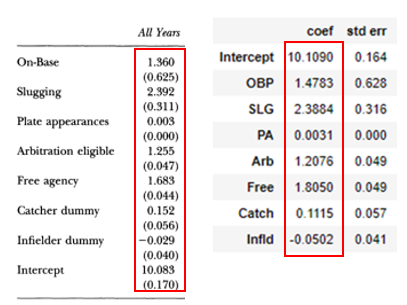

It's also noticeable that the standard errors (which are numbers in parentheses from the published paper) are also quite close to the standard errors from our regression. 

Moreover, the key part of the Moneyball narrative is confirmed: taking the period as a whole, the size of the coefficient on slugging percentage is almost twice the size as the coefficient of on-base percentage, while the standard error is half the size. This means that in terms of player salaries, slugging percentage was more significant both in an economic sense and a statistical sense.  

If we run the regression for the period 2000-2003 (column 2 of Table 3) we also find our results are very close to those of Hakes and Sauer.

In [30]:
# Regression for labor market valuation of OBP and SLG for seasons 2000-2003 = Table 3 Column 2

MB_Data_Pre = Master[(Master.SalYear >= 2000) & (Master.SalYear <= 2003)]
Val_Pre_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data_Pre).fit()
Val_Pre_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnSal   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     423.2
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:36:33   Log-Likelihood:                -1512.2
No. Observations:                1398   AIC:                             3040.
Df Residuals:                    1390   BIC:                             3082.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2248      0.176     58.008      0.000       9.879      10.571
OBP            0.7958      0.677      1.176      0.240      -0.532       2.123
SLG            2.4908      0.340      7.322      0.000       1.823       3.158
PA             0.0031      0.000     24.172      0.000       0.003       0.003
Arb            1.2559      0.054     23.432      0.000       1.151       1.361
Free           1.8729      0.053     35.018      0.000       1.768       1.978
Catch          0.1330      0.062      2.156      0.031       0.012       0.254
Infld         -0.0282      0.044     -0.639      0.523      -0.115       0.058
==============================================================================
Omnibus:                        7.962   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.336
Skew:                          -0.041   Prob(JB):                      0.00570
Kurtosis:                       3.413   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comparing the coefficients and standard errors, the message is the same from both sets of results - before the publication of Moneyball, OBP was statistically insignificant, while the impact of SLG on salary was three times larger and statistically significant.  

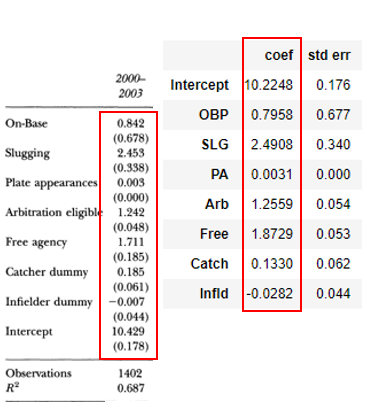 

We can continue to compare the regressions one by one, but as we did with Table 1, it makes more sense to format our results in a way that looks like Table 3.  



In [31]:
# Here we just run each regression by taking a subset for the relevant year, but we don't print out the results. 

MB_Data_2000 = Master[(Master.SalYear == 2000)]
Val_2000_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data_2000).fit()
MB_Data_2001 = Master[(Master.SalYear == 2001)]
Val_2001_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data_2001).fit()
MB_Data_2002 = Master[(Master.SalYear == 2002)]
Val_2002_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data_2002).fit()
MB_Data_2003 = Master[(Master.SalYear == 2003)]
Val_2003_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data_2003).fit()
MB_Data_2004 = Master[(Master.SalYear == 2004)]
Val_2004_lm = smf.ols(formula = 'lnSal ~ OBP + SLG + PA + Arb + Free + Catch + Infld', data=MB_Data_2004).fit()

Having created the regressions, we can now display them in the same column format as Table 3, in the same way that we did with Table 1.

In [32]:
from statsmodels.iolib.summary2 import summary_col
Header = ['All years','2000-2003','2000','2001','2002','2003','2004']
Table_3 = summary_col([Val_All_lm,Val_Pre_lm,Val_2000_lm,Val_2001_lm,Val_2002_lm,Val_2003_lm,Val_2004_lm,],\
                      regressor_order=['OBP','SLG','PA','Arb','Free','Catch','Infld','Intercept'],stars=True, \
                      float_format="'%.3f'",model_names = Header)
print(Table_3)


           All years   2000-2003     2000        2001        2002        2003       2004   
-------------------------------------------------------------------------------------------
OBP       '1.478'**   '0.796'     '2.179'*   '0.132'     '0.595'     '1.890'     '4.353'***
          ('0.628')   ('0.677')   ('1.217')  ('1.209')   ('1.566')   ('1.585')   ('1.630') 
SLG       '2.388'***  '2.491'***  '2.550'*** '3.224'***  '2.312'***  '1.945'**   '2.171'***
          ('0.316')   ('0.340')   ('0.610')  ('0.597')   ('0.724')   ('0.846')   ('0.820') 
PA        '0.003'***  '0.003'***  '0.002'*** '0.003'***  '0.003'***  '0.003'***  '0.003'***
          ('0.000')   ('0.000')   ('0.000')  ('0.000')   ('0.000')   ('0.000')   ('0.000') 
Arb       '1.208'***  '1.256'***  '1.296'*** '1.111'***  '1.289'***  '1.247'***  '1.044'***
          ('0.049')   ('0.054')   ('0.102')  ('0.100')   ('0.114')   ('0.114')   ('0.120') 
Free      '1.805'***  '1.873'***  '1.914'*** '1.788'***  '1.937'***  '1.814'***

Now we can compare the two versions in full:  

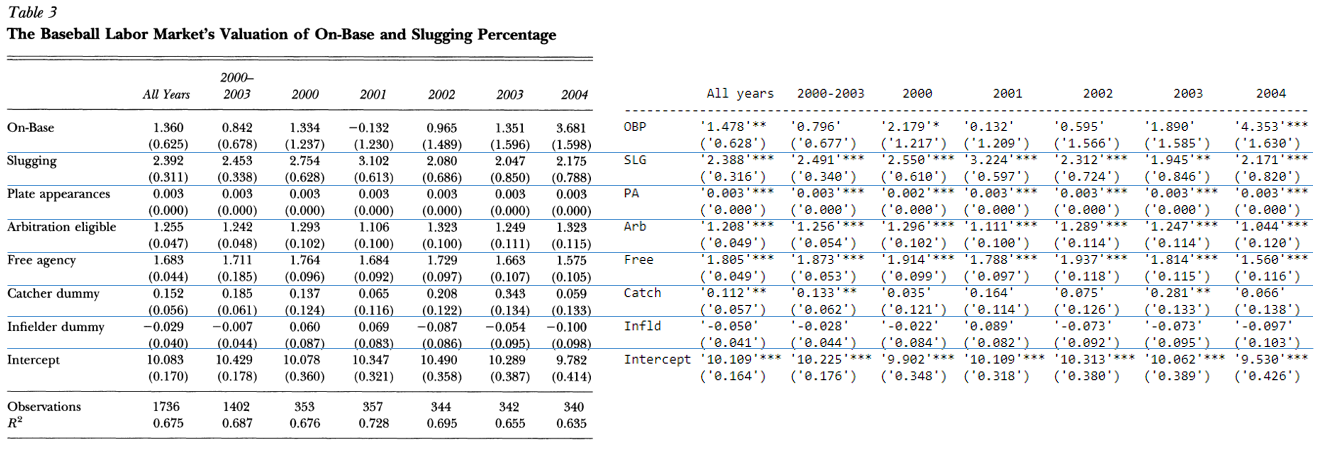

Our version of Table 3 reproduces the Moneyball result very closely: SLG is consistently significant in a statistical sense (the ratio of the coefficient to the standard error is consistently above 2, while before the publication of Moneyball, OBP is consistently insignificant in a statistical sense. Then in 2004 not only does it become statistically significant, but the size of the coefficient is twice as large as SLG.  

How can we explain the fact that our estimates, although very close in general, are not identical, and in a few cases differ quite widely? One possible explanation is that since Hakes and Sauer wrote their paper in 2006, the Lahman database has been revised several times, and errors from previous versions may have been corrected. Another possibility is that, while we have tried to follow Hakes and Sauer's methodology exactly, we may have diverged from them in some small ways. For example, you can see that the number of observations for each regression is slightly different - and different samples will generally produce different estimates.  

Notwithstanding these small differences, our results are very close. It is a common problem in the sciences that results cannot be reproduced - it's a credit to Hakes and Sauer that there is no such problem with theirs.

## Self test

Replace OBP with Batting Average to see how have teams valued batting average over this timeframe? 
When you do this, how does the R-squared of the regression model compare to H & S model for OBP and SLG?

In [33]:
# Now save our Master file so we can re-use it later

Master.to_csv("../Data/Master.csv")